In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

In [1]:
from matplotlib import font_manager, rc

#사용하려는 OTF 폰트의 경로 지정
font_path = r'C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NotoSansKR-Regular.otf'

#폰트 이름
font_name = font_manager.FontProperties(fname=font_path).get_name()

#폰트 설정
rc('font', family=font_name)

In [12]:
df = pd.read_excel('C:\Python Project\Creative_Convergence_Competition_2023\Excel\전자상거래_경험_여부.xlsx')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분별1    85 non-null     object
 1   구분별2    85 non-null     object
 2   2021    85 non-null     object
 3   2021.1  85 non-null     object
 4   2021.2  85 non-null     object
 5   2022    85 non-null     object
 6   2022.1  85 non-null     object
 7   2022.2  85 non-null     object
dtypes: object(8)
memory usage: 5.4+ KB


,구분별1,구분별2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,구분별1,구분별2,사례수,있다,없다,사례수,있다,없다
1,전체,소계,9532.9,72.4,27.6,9366.3,74.3,25.7
2,성별,남,4742.8,68.6,31.4,4652.7,70.5,29.5
3,성별,여,4790.1,76,24,4713.6,78,22
4,연령,만10-19세,567.7,44.6,55.4,557,49,51


In [9]:
byAge = df.query("구분별1 == '연령'")
byAge = byAge.drop(byAge.columns[0], axis=1)    #불필요한 열 제거

#경험 여부별 2년간 평균치 구한 값 셀에 추가
byAge = byAge.assign(
    경험있다 = lambda x: (x['2021.1'] + x['2022.1']) / 2,
    경험없다 = lambda x: (x['2021.2'] + x['2022.2']) / 2,
    차이1 = lambda x: x['2022.1'] - x['2021.1'],    #경험o
    차이2 = lambda x: x['2022.2'] - x['2021.2'] #경험x
)

byAge

,구분별2,2021,2021.1,2021.2,2022,2022.1,2022.2,경험있다,경험없다,차이1,차이2
4,만10-19세,567.7,44.6,55.4,557,49,51,46.8,53.2,4.4,-4.4
5,만20-29세,1411.4,97.1,2.9,1335.1,97.4,2.6,97.25,2.75,0.3,-0.3
6,만30-39세,1441.2,96.5,3.5,1345,95.8,4.2,96.15,3.85,-0.7,0.7
7,만40-49세,1694,92,8,1652,94.6,5.4,93.3,6.7,2.6,-2.6
8,만50-59세,1788,81.3,18.7,1764.2,84.4,15.6,82.85,17.15,3.1,-3.1
9,만60-69세,1453.5,50,50,1485.6,57.3,42.7,53.65,46.35,7.3,-7.3
10,만70세이상,1177.2,12.4,87.6,1227.5,15.9,84.1,14.15,85.85,3.5,-3.5


In [32]:
byAgeMean = byAge.iloc[:, [0, 2,3,5,6,7,8,9,10]]

byAgeMean.columns = ['연령대','있다 2021년', '없다 2021년', '있다 2022년', '없다 2022년', '경험있다', '경험없다', '2년간 경험한 비율 차이', '2년간 경험하지 않은 비율 차이']
byAgeMean

,연령대,있다 2021년,없다 2021년,있다 2022년,없다 2022년,경험있다,경험없다,2년간 경험한 비율 차이,2년간 경험하지 않은 비율 차이
4,만10-19세,44.6,55.4,49,51,46.8,53.2,4.4,-4.4
5,만20-29세,97.1,2.9,97.4,2.6,97.25,2.75,0.3,-0.3
6,만30-39세,96.5,3.5,95.8,4.2,96.15,3.85,-0.7,0.7
7,만40-49세,92,8,94.6,5.4,93.3,6.7,2.6,-2.6
8,만50-59세,81.3,18.7,84.4,15.6,82.85,17.15,3.1,-3.1
9,만60-69세,50,50,57.3,42.7,53.65,46.35,7.3,-7.3
10,만70세이상,12.4,87.6,15.9,84.1,14.15,85.85,3.5,-3.5


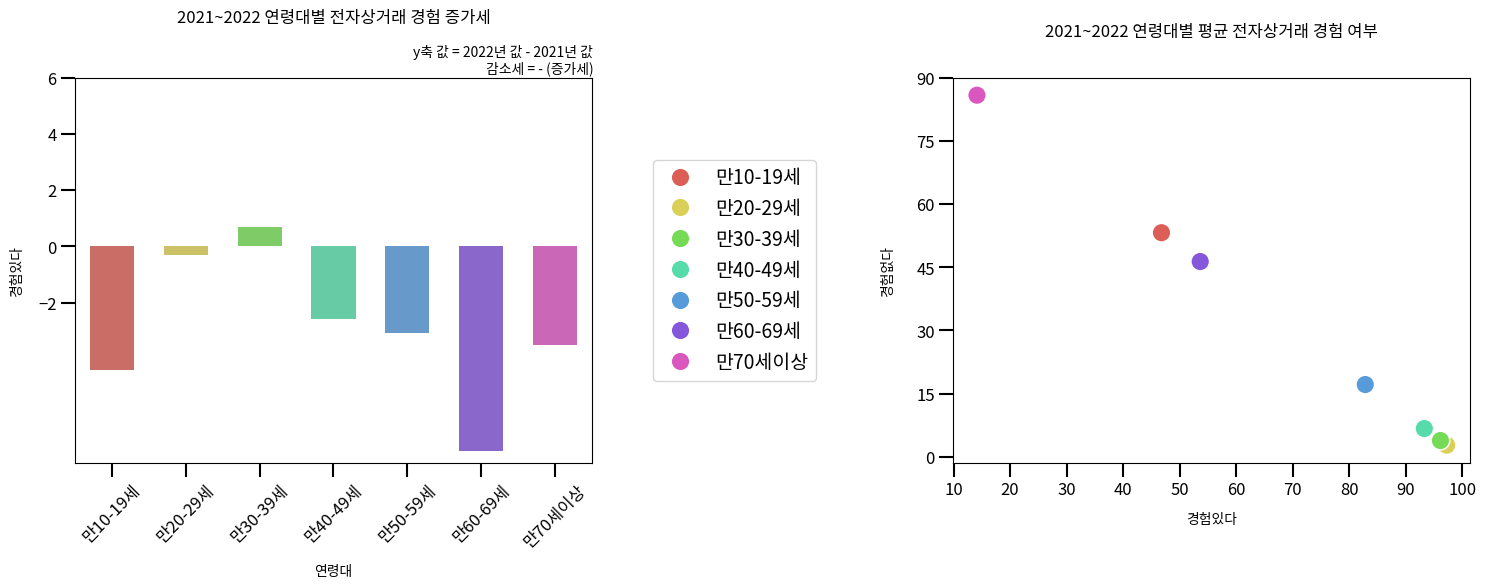

In [39]:
fig, ax = plt.subplots(ncols=2, figsize=(18,5))
fig.subplots_adjust(wspace=0.7)     #두 그래프 사이의 상하 간격 설정
cm = sns.color_palette('hls', len(byAgeMean['연령대'].unique()))      #그래프 색상 설정
width = 0.6     #막대그래프 크기

grp1 = sns.barplot(data=byAgeMean, x='연령대', y='2년간 경험하지 않은 비율 차이', palette=cm, ax=ax[0])

grp1.set_title('2021~2022 연령대별 전자상거래 경험 증가세', pad=40)     #막대 그래프 타이틀
grp1.text(6.52, 7.2, 'y축 값 = 2022년 값 - 2021년 값', va='top', ha='right', fontsize=10)     #막대 그래프 텍스트 추가
grp1.text(6.525, 6.6, '감소세 = - (증가세)', va='top', ha='right', fontsize=10)

grp1.tick_params(labelsize=12, width=1.5, length=10)      #막대 그래프 x·y축 글자 크기·두께·길이
grp1.tick_params(axis='x', labelrotation=45)      #막대그래프 x축 글자 회전
grp1.set_xlabel('연령대', labelpad=10)      #막대그래프 x축 설정(타이틀, 여백)
grp1.set_yticks(np.arange(-2,8,2))     #막대 그래프 y축 값 범위와 간격
grp1.set_ylabel('경험있다', labelpad=10)     #막대 그래프 y축 설정(타이틀, 여백)

grp1.legend([], [], frameon=False)

for bar in grp1.patches:
    x = bar.get_x() #막대 좌측 하단 x좌표
    old_width = bar.get_width() #기존 막대 폭
    bar.set_width(width)  #폭 변경
    bar.set_x(x+(old_width-width)/2) #막대 좌측 하단 x좌표 업데이트

grp2 = sns.scatterplot(data = byAgeMean,
    x = '경험있다',
    y = '경험없다',
    s = 180,
    hue = '연령대',
    palette = cm,
    ax = ax[1]
)

grp2.set_title('2021~2022 연령대별 평균 전자상거래 경험 여부', pad=30)
grp2.tick_params(labelsize=12, width=1.5, length=10)
grp2.set_xticks(np.arange(10,101,10))
grp2.set_xlabel('경험있다', labelpad=10)
grp2.set_yticks(np.arange(0,91,15))
grp2.set_ylabel('경험없다', labelpad=15)

grp2.legend(loc = 'center left', bbox_to_anchor=(-0.6, 0.5), fontsize=14)      #범례 위치와 글자 크기

plt.show()